# **Setting up colab with GPUs**

In [2]:
import torch

In [5]:
torch.cuda.is_available()

True

# **Exercise I: getting familiar with tensors**

In [18]:
tens1 = torch.tensor([[1., 2.], [3., 4.]]) # initializing a tensor with torch.tensor

In [19]:
import numpy as np

tens2 = torch.from_numpy(np.array([[1, 2], [3, 4]])) # initialize a tensor with torch.from_numpy

In [14]:
torch.ones(2,2) # initialize a tensor with torch.ones(size)

tensor([[1., 1.],
        [1., 1.]])

In [15]:
torch.zeros(2,2) # initialize a tensor with torch.zeros(size)

tensor([[0., 0.],
        [0., 0.]])

In [17]:
torch.rand(2,2) # initialize a tensor with torch.rand(size) with uniform on [0,1)

tensor([[0.3435, 0.6700],
        [0.7820, 0.2961]])

A ```torch.dtype``` is an object that represents the **data type of a torch.Tensor**. PyTorch has twelve different data types: float, double, short, bool etc.
A ```torch.device``` is an object representing the **device on which a torch.Tensor is or will be allocated**.

In [24]:
tens1.device # checking on which device the tensor lives, here CPU

device(type='cpu')

In [26]:
tens1.to('cuda') # moving the tensor to the GPU using tensor.to()

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [33]:
np.exp(tens1[1:]) # slicing the tensors and using functions

tensor([[3., 4.]])

In [64]:
import time

# Initialising two random tensors
tensor1 = torch.rand(10**4,10**4)
tensor2 = torch.rand(10**4,10**4)

# Measuring the time to do matrix multiplication using the CPU
start = time.time()
torch.matmul(tensor1, tensor2) # multiplying the two tensors
end = time.time()
print("Using the CPU, the time elapsed is: ", end - start)

Using the CPU, the time elapsed is:  19.90334916114807


In [65]:
# Moving the tensors to the GPU
# Initialising two random tensors
tensor1 = torch.rand(10**4,10**4, device='cuda:0')
tensor2 = torch.rand(10**4,10**4, device='cuda:0')

# Measuring the time to do matrix multiplication using the GPU
start2 = time.time()
torch.matmul(tensor1, tensor2)
end2 = time.time()
print("Using the GPU, the time elapsed is: ", end2 - start2)

Using the GPU, the time elapsed is:  0.0003066062927246094


# **Exercise II: A very short introduction to autodiff**

```Tensor.requires_grad_(requires_grad=True)``` requires_grad_()’s main use case is to tell autograd to begin recording operations on a Tensor tensor. If tensor has requires_grad=False (because it was obtained through a DataLoader, or required preprocessing or initialization), tensor.requires_grad_() makes it so that autograd will begin to record operations on tensor.

In [81]:
test = torch.tensor(([[1., 2.], [3., 4.]]))
test

tensor([[1., 2.],
        [3., 4.]])

In [82]:
test.requires_grad_()
out = torch.square(test) # squaring the elements of the tensor using torch.tensor(tens)
out = torch.sum(out) # summing the elements of the tensor using torch.tensor(tens)

In [83]:
out.backward()
test.grad

tensor([[2., 4.],
        [6., 8.]])

Running ```out.backward()``` a second time yields an error:

In [77]:
out.backward()
test.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [91]:
out = torch.square(out) # squaring the elements of the tensor using torch.tensor(tens)
out = torch.sum(out)
out.backward()
test.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

# **Exercise III: preparing the data**

In [99]:
import torchvision.datasets as dset
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [105]:
dataset = MNIST(root = 'data/', download = True)
print("There are ",len(dataset)," examples")

There are  60000  examples


Label: 0
Type: <class 'tuple'>
Type: <class 'PIL.Image.Image'>
Type: <class 'int'>


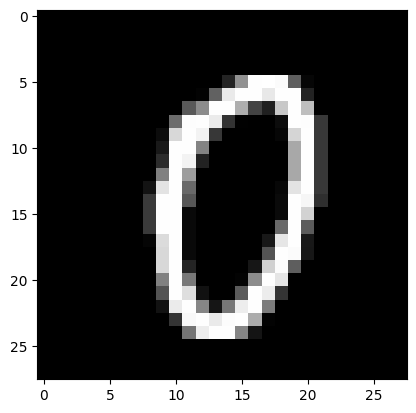

In [107]:
image, label = dataset[1000]
plt.imshow(image, cmap = 'gray')
print('Label:', label)
print('Type:', type(dataset[1000]))
print('Type:', type(image))
print('Type:', type(label))

In [108]:
from torchvision import transforms
my_transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x : torch.flatten(x))])


In [ ]:
mnist_data = MNIST(root = '/data/', download=True, transform=my_transform)

In [111]:
train_set, val_set = torch.utils.data.random_split(mnist_data, [int(0.8*len(mnist_data)), int(0.2*len(mnist_data))])

In [112]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,shuffle=True)

In [118]:
train_features, train_labels = next(iter(train_loader))

# **Exercise IV: creating a neural network**

In [128]:
import torch.nn as nn
from torch.nn.functional import softmax

input_size = 784
d_1 = 100
output_size = 10

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation =nn.ReLU()
        self.l1 = nn.Linear(input_size,d_1)
        self.l2 = nn.Linear(d_1,output_size)

    def forward(self, x):
        x = self.l1(x)
        x = self.activation(x)
        return softmax(x, dim=1)


In [129]:
mynet = MyNetwork()


# **Exercise V: training the network**

In [126]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
import torch.optim as optim

dev = 'cuda:0'
epochs = 1
learning_rate = 1e-2

optimizer = torch.optim.SGD(my.parameters(), lr=0.1, momentum=0.9)
optimizer.zero_grad()

<generator object Module.parameters at 0x7ff6193b7ed0>